## PHYS 105A:  Introduction to Scientific Computing

# Integration of Differential Equations III

Chi-kwan Chan

## Newton's Second Law is an ordinary differential equation (ODE)

* Given this is an introduction to computational physics course, we are interested in solving, e.g., Newton's equation:

  $m \frac{d^2 x}{dt^2} = f(x, t)$
  
* We can trivially cast this second order ODE into a system of two first order ODEs:
 
  $\frac{dx}{dt} = v$
  
  $\frac{dv}{dt} = \frac{1}{m}f(x, t)$
  
* Using "vector" notation, we define $X = [x, v]^t$ and $F = [v, f/m]^t$ so that
 
  $\frac{dX}{dt} = F(X, t)$.

## Euler's Method

* The ordinary differential equation (ODE) equations we want to solve takes the generic form:

  $\frac{dX}{dt} = F(X, t)$
  
  where $X$ may be a vector.
  
* Euler's Method allows us to step the solution forward:

  $X_{n+1} = X_n + f(X_n, t_n) \Delta t$
  
  where $\Delta t$ is the time step.

## Second-order Runge-Kutta Method

* To make the implementation easier, let's use the standard convention:

  $k_1 = \Delta t f(X_n, t_n)$
  
  $k_2 = \Delta t f(X_n + \frac{1}{2}k_1, t_n + \frac{1}{2}\Delta t)$
  
  $X_{n+1} = X_n + k_2 + \mathcal{O}(h^3)$

## Fourth-Order Runge-Kutta Method

* The classic 4th Runge-Kutta method:

  $k_1 = \Delta t f(X_n, t_n)$
  
  $k_2 = \Delta t f(X_n + \frac{1}{2}k_1, t_n + \frac{1}{2}\Delta t)$

  $k_3 = \Delta t f(X_n + \frac{1}{2}k_2, t_n + \frac{1}{2}\Delta t)$
  
  $k_4 = \Delta t f(X_n + k_3, t_n + \Delta t)$
    
  $X_{n+1} = Y_n + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4 + \mathcal{O}(\Delta t^5)$

## Question: Is High Order Always Better?

* Different numerical schemes have different error properties.

* Convergence rate only describe how these errors get reduce when we decrease the time step.

* However, it does not the constant in front of the error term.

* It also does not describe *WHAT* error we are getting.

## Consider Newton's Law of Universal Gravitation

* $f = - \frac{G m_1 m_2}{r^2} \hat{\mathbf{r}}$

* In classical mechanics, you will learn to solve one- and two-body problem.

* "One-body" problem is simply a test particle move in a gravitationl potential.

* Two-body problem can always be transformed into the "one-body" proble and solved analytically.

* Three-body problem is non-linear and chaotic.

## Formulation

* Cast the system of 2nd order ODEs
    
  $m_i \frac{d\mathbf{x}_i^2}{dt^2} = - \sum_{j \ne i} \frac{G m_i m_j}{r_{ij}^2} \hat{\mathbf{r}}_{ij}$
  
  into systems of 1st order ODEs:
  
  $\frac{d\mathbf{x}_i}{dt} = \mathbf{v}_i$

  $m_i \frac{d\mathbf{v}_i}{dt} = - \sum_{j \ne i} \frac{G m_i m_j}{r_{ij}^2} \hat{\mathbf{r}}_{ij}$


In [1]:
import numpy as np
from matplotlib import pyplot as plt

def RK4(f, x, t, dt, n):
    T = np.array(t)
    X = np.array(x)
    
    for i in range(n):
        k1 = dt * np.array(f(*(x         )))
        k2 = dt * np.array(f(*(x + 0.5*k1)))
        k3 = dt * np.array(f(*(x + 0.5*k2)))
        k4 = dt * np.array(f(*(x +     k3)))
        
        t += dt
        x += k1/6 + k2/3 + k3/3 + k4/6
        
        T = np.append( T, t)
        X = np.vstack((X, x))
        
    return T, X

In [2]:
def f(x, y, vx, vy):
    rr  = x * x + y * y
    r   = np.sqrt(rr)
    rrr = r * rr
    ax  = -x / rrr
    ay  = -y / rrr
    return vx, vy, ax, ay

In [13]:
N = 5_000
T, X = RK4(f, (0, 1, 1, 0), 0, 100/N, N)

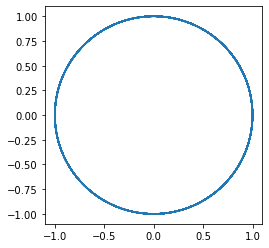

In [14]:
x = X[:,0]
y = X[:,1]

plt.plot(x, y)
plt.gca().set_aspect('equal')

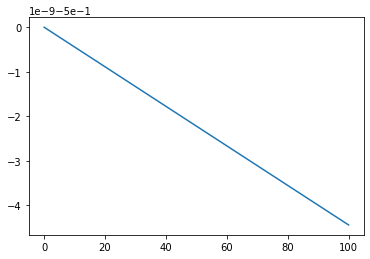

In [15]:
x  = X[:,0]
y  = X[:,1]
vx = X[:,2]
vy = X[:,3]

KE = 0.5 * (vx*vx + vy*vy)
PE = -1 / np.sqrt(x*x + y*y)

plt.plot(T, KE + PE)

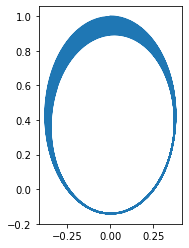

In [16]:
N = 5_000
T, X = RK4(f, (0, 1, 0.5, 0), 0, 100/N, N)
x = X[:,0]
y = X[:,1]

plt.plot(x, y)
plt.gca().set_aspect('equal')

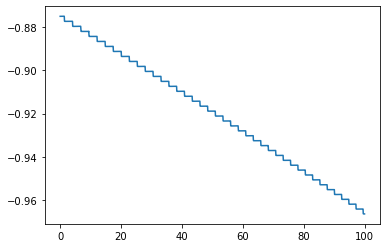

In [17]:
x  = X[:,0]
y  = X[:,1]
vx = X[:,2]
vy = X[:,3]

KE = 0.5 * (vx*vx + vy*vy)
PE = -1 / np.sqrt(x*x + y*y)

plt.plot(T, KE + PE)

## Runge-Kutta Methods Do Not Conserver Energy

* As we evolve in time, the energy in general decrease in a Runge-Kutta scheme.

* This is a problem when we want to integrate, e.g., the solar system for millions of years to study its stability.

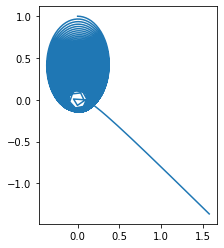

In [20]:
N = 3_000
T, X = RK4(f, (0, 1, 0.5, 0), 0, 100/N, N)
x = X[:,0]
y = X[:,1]

plt.plot(x, y)
plt.gca().set_aspect('equal')

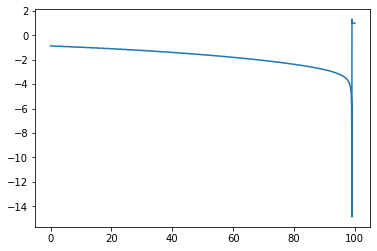

In [21]:
x  = X[:,0]
y  = X[:,1]
vx = X[:,2]
vy = X[:,3]

KE = 0.5 * (vx*vx + vy*vy)
PE = -1 / np.sqrt(x*x + y*y)

plt.plot(T, KE + PE)

## Runge-Kutta Methods Do Not Conserver Energy

* As we evolve in time, the energy in general decrease in a Runge-Kutta scheme.

* This is a problem when we want to integrate, e.g., the solar system for millions of years to study its stability.

* The "planet" artificially falls onto the "sun".

* While RK4 gives us "accurate" results in the sense that in each orbit, its error is not that big; however, it leads to completely wrong conclusion!

* We need to do better.